<a href="https://colab.research.google.com/github/rickyC3/boston_housing_prediction/blob/main/boston_housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data() # 載入資料
#https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data

In [ ]:
# 檢查資料型態、形狀
print(type(x_train))



<class 'numpy.ndarray'>
(404, 13)


In [ ]:
print(x_train.shape)
print(x_train[0])

(404, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [ ]:
model = keras.Sequential()

model.add(Dense(64,  input_shape = (13,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                896       
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train, y_train, validation_split = 0.2, epochs = 500)

In [ ]:
print((model.history.history.keys()))

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


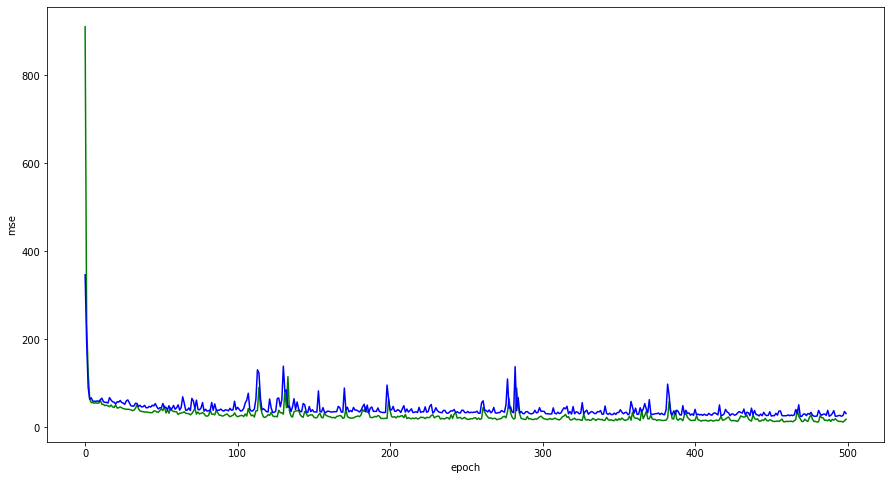

In [ ]:
plt.figure(figsize=(15,8))

plt.xlabel('epoch')
plt.ylabel('mse')

plt.plot(model.history.history['loss'][:], 'g')   # 學習的損失函數
plt.plot(model.history.history['val_loss'][:], 'b') # 驗證的損失函數

In [ ]:
scores = model.evaluate(x_test, y_test)
scores

4/4 [==============================] - 0s 4ms/step - loss: 33.8234 - mse: 33.8234 - mae: 4.4863


[33.823448181152344, 33.823448181152344, 4.486333847045898]

4/4 [==============================] - 0s 3ms/step


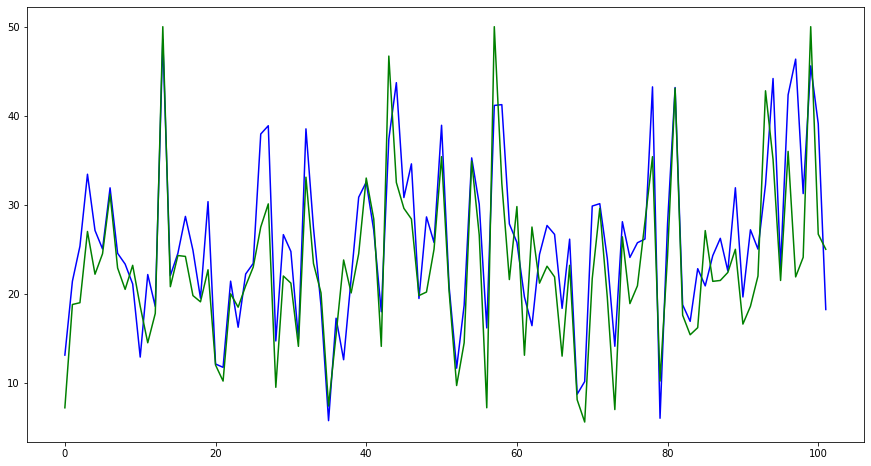

In [ ]:
y_pre = model.predict(x_test)
plt.figure(figsize=(15,8))


plt.plot(y_pre, 'b')  # 藍色 預測
plt.plot(y_test, 'g') #  綠色 實際

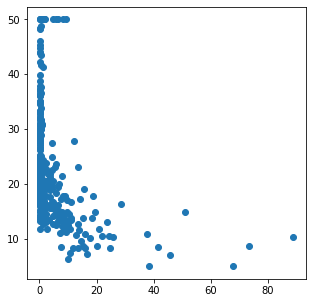

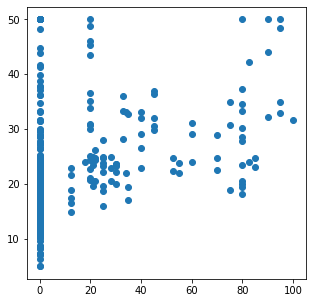

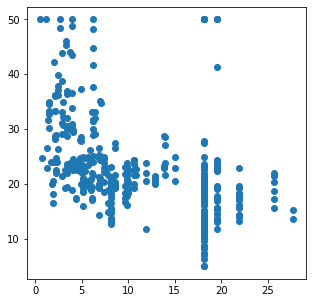

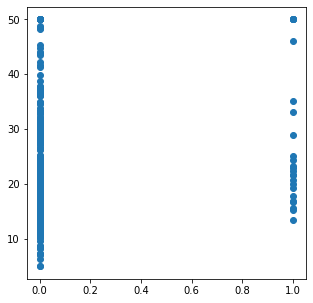

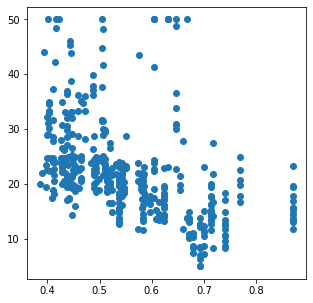

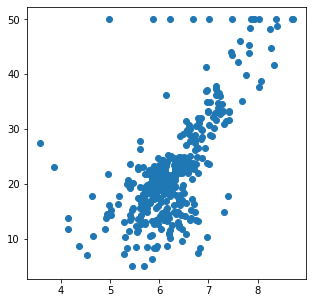

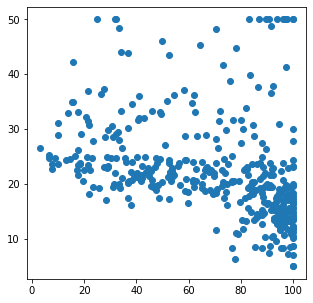

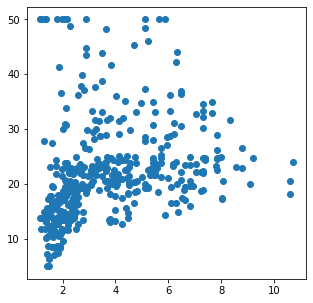

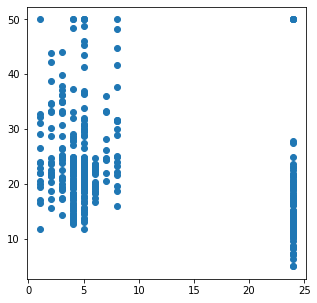

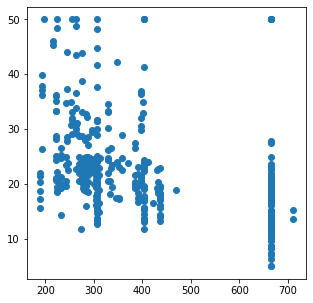

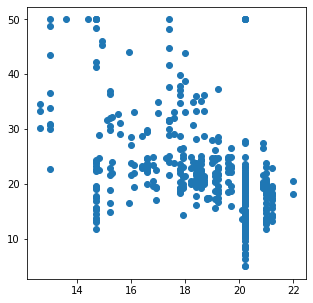

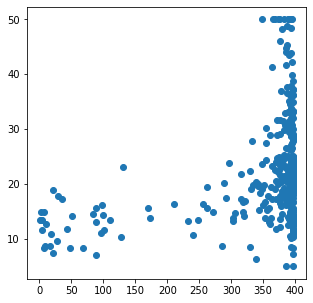

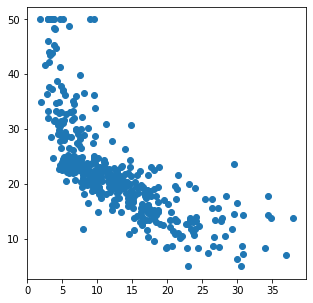

In [ ]:
# 資料分析

#plt.figure(figsize = (15, 15))
for i in range(13):
  plt.figure(figsize = (5, 5))
  plt.scatter(x_train[:, i], y_train)
#0, 5, 11 12

In [ ]:
x_train2 = np.zeros((404, 2))
x_test2 = np.zeros((102, 2))
y_train2 = np.zeros((404))
y_test2 = np.zeros((102))

In [ ]:
for i in range(404):
  x_train2[i, 0] = x_train[i, 5]
  x_train2[i, 1] = x_train[i, 12]
  y_train2[i] = y_train[i]

for i in range(102):
  x_test2[i, 0] = x_test[i, 5]
  x_test2[i, 1] = x_test[i, 12]
  y_test2[i] = y_test[i]

In [ ]:
model2 = keras.Sequential()

model2.add(Dense(20,  input_shape = (2,), activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(20, activation = 'relu'))




model2.add(Dense(1, activation = 'linear'))

model2.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae', 'mse'])
#https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8-%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E4%BB%8B%E7%B4%B9-%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8-loss-function-2dcac5ebb6cb

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                60        
                                                                 
 dense_17 (Dense)            (None, 64)                1344      
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 20)                2580      
                                                                 
 dense_20 (Dense)            (None, 1)                 21        
                                                                 
Total params: 12,325
Trainable params: 12,325
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(x_train2, y_train2, validation_split = 0.2, epochs = 500)

In [ ]:
print((model2.history.history.keys()))

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


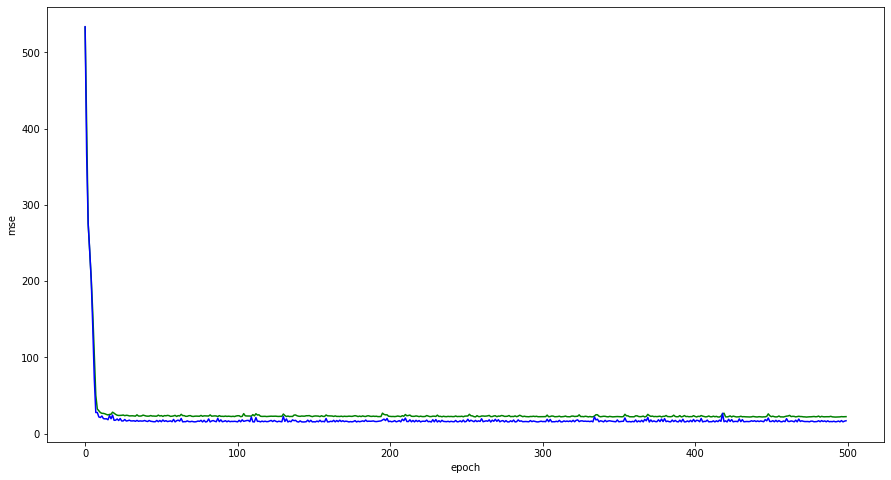

In [ ]:
plt.figure(figsize=(15,8))

plt.xlabel('epoch')
plt.ylabel('mse')

plt.plot(model2.history.history['loss'][:], 'g')   # 學習的損失函數
plt.plot(model2.history.history['val_loss'][:], 'b') # 驗證的損失函數


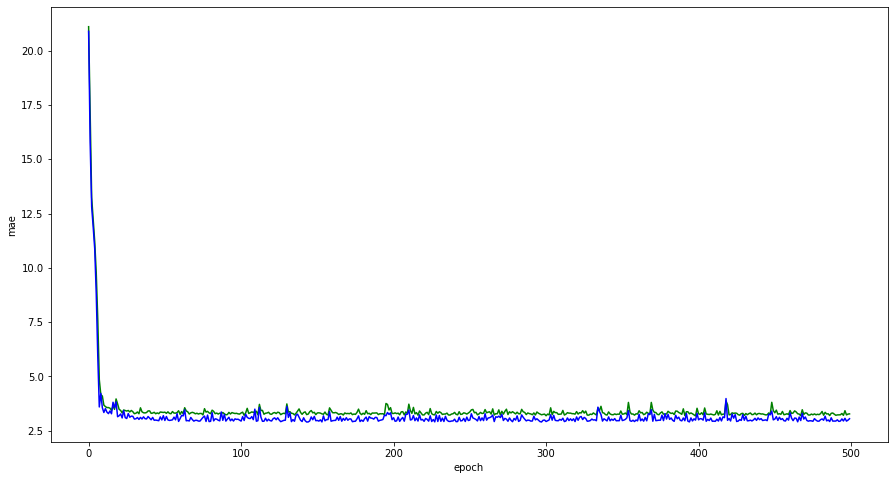

In [ ]:
plt.figure(figsize=(15,8))

plt.xlabel('epoch')
plt.ylabel('mae')

plt.plot(model2.history.history['mae'][:], 'g')   # 學習的損失函數
plt.plot(model2.history.history['val_mae'][:], 'b') # 驗證的損失函數

In [ ]:
scores = model2.evaluate(x_test2, y_test2)

4/4 [==============================] - 0s 4ms/step - loss: 25.6484 - mae: 3.6496 - mse: 25.6484


In [ ]:
y_pre = model2.predict(x_test2)

4/4 [==============================] - 0s 3ms/step


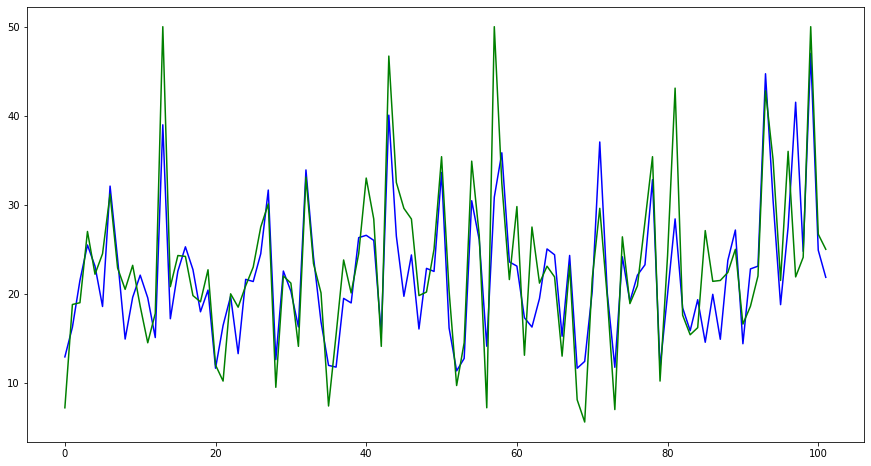

In [ ]:
plt.figure(figsize=(15,8))


plt.plot(y_pre, 'b')  # 藍色 預測
plt.plot(y_test, 'g') #  綠色 實際

In [ ]:
tf.saved_model.save(model2, "HI")

:Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population